In [1]:
from sympy import *

In [2]:
init_printing()

In [3]:
class Symbolic: pass
sym = Symbolic()

sym.f = IndexedBase('f')
sym.nu = IndexedBase(r'\nu')
sym.r = IndexedBase('r')
sym.x, sym.y = symbols('x y')
sym.h = symbols('h')
sym.n = symbols('n', integer=True, positive=True)
sym.i = Wild('i')
sym.w = Wild('w')

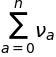

In [5]:
a = symbols('a',cls=Idx)
s = summation( sym.nu[a], (a,0,n))
s

In [6]:
s1 = s.subs(n,5).doit()
s1

In [7]:
s1.replace(Indexed, lambda i,j: 1 )

In [20]:
import numpy as np

class Numeric: pass

def cspline(h,dim):
    K = (2./3, 10*np.pi/7, 1./np.pi)[dim-1]/h**dim
    return (
        np.vectorize( lambda q: K* ( 0 if q > 2 else ( .25*(2-q)**3 if q > 1 else 1 - 1.5*q**2+.75*q**3 ) ) ), 
        np.vectorize( lambda q: K* ( 0 if q > 2 else ( -3*.25*(2-q)**2 if q > 1 else - 3*q+ 3*.75*q**2 ) ) ),
        np.vectorize( lambda q: K* ( 0 if q > 2 else ( 6*.25*(2-q) if q > 1 else -3 + 6*.75*q ) ) )
        )

num = Numeric()
num.dt=.1
num.h=2*num.dt
num.L = 4
num.N = int(90/num.h)
num.r = np.r_[-num.L:num.L:2.*num.L/num.N]
num.nu = np.ones_like(num.r)
len(num.r)

In [8]:
W = Function('W')
Wprime = Function('W\'')
W.fdiff = lambda self,i_: Wprime(self.args[0])
W(x).diff()

In [12]:
def generateindex(i=0):
    return Dummy('a_%d'%i)

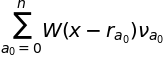

In [21]:
#indexes = sp.symbols('a b c d e f', cls=sp.Idx)
class rho(Function):
    @classmethod
    def eval(cls, x_, j_=0 ):
        return (lambda i_: summation( nu[i_]*W(x_-r[i_] ), (i_,0,n) ))(generateindex(j_))
    
    @classmethod
    def fdiff(cls):
        global a
        a += [Dummy('a_%d'%len(a))]
        return cls.diff()

rho(x)

In [17]:
def rho_f():
    return lambda x

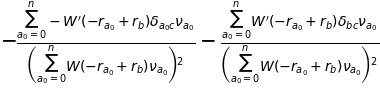

In [9]:
c = symbols('c', cls=Idx)
b = symbols('b', cls=Idx)
diff(1/rho(r[b]), r[c]).expand()

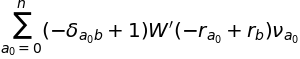

In [11]:
diff( rho(r[b]), r[b] )

In [22]:
def Symbolic.sph( self, f, j_=0 ):
    i_ = Dummy('b')
    return lambda x_: summation( f[i_]*self.nu[i_]*self.W(x_-r[i_] )/self.rho(r[i_]), (i_,0,self.n) )

sym.f_sph = sym.sph(f)(x)
sym.f_sph

SyntaxError: invalid syntax (<ipython-input-22-3206043fdb68>, line 1)

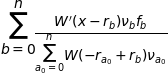

In [14]:
df_sph = diff( sph(f)(x), x)
df_sph

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

AttributeError: 'NoneType' object has no attribute 'is_Float'

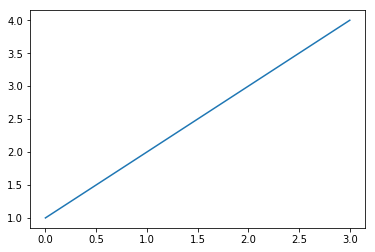

In [16]:
plt.figure()
x_ = range(100)
plt.plot(x_,)
#plt.show()

In [ ]:
b = sp.symbols('b', cls=sp.Idx)
F = sp.summation( f[b]*nu[b]/rho(r[b]), (b,0,n) )
F

In [ ]:
res = sp.diff( F, r[c] ).expand().simplify().doit()
res.args[0][0].simplify()

In [ ]:
#f_cspm = lambda x_: sp.summation( nu[i]*W(r[i]-x_)*f[i], (i,0,n) )/rho(x_)
#f_cspm(x).replace( rho(a), sp.Function(r'\rho')(a) )
def cspm( f ):
    i_ = Dummy('b')
    if type(f) is sp.Function:
        F = f(r[i_])
    else:
        F = f[i_]
    return lambda x_: sph(f)(x_)/rho(x_)

cspm(f)(x)

In [ ]:
sp.diff( cspm(f)(x), x )

In [ ]:
g = sp.Function('g')
gprime = sp.Function("g'")
A, B = sp.symbols('A B')
expr1 = sphf(x,g)-g(x)*sphf(x,lambda x_:1) - sphf(x,lambda x_:x_-x)*gprime(x)
expr1 = expr1.replace(g(r[a]), sp.IndexedBase('g')[a]).replace( g(x), A).replace( gprime(x), B)
expr1

In [ ]:
expr1\
.replace( I_sph(a), sp.Function('I')(a) )\
.replace( Delta_sph(a), sp.Function('\Delta')(a) )\
.replace( rho(a), sp.Function(r"\rho")(a) )\
.replace( sphf(a,g), sp.Function("G")(a) )

In [ ]:
i4 = sp.symbols('i_4', cls=sp.Idx)
expr3 = sphfD(x,g) - g(x)*sphfD(x, lambda x_:1) - sphfD(x, lambda x_:x_-x)*gprime(x)
expr3 = expr3.replace(i3, i4).replace(g(r[a]), sp.IndexedBase('g')[a]).replace( g(x), A).replace( gprime(x), B)
expr3

In [ ]:
i5 = sp.symbols('i_5', cls=sp.Idx)
expr2 = sphfDiff(x,g) \
    - g(x)*sphfDiff(x, lambda x_:1) \
    - sphfDiff(x, lambda x_:x_-x)*gprime(x)
expr2 = expr2.replace(i3, i5).replace(g(r[a]), sp.IndexedBase('g')[a]).replace( g(x), A).replace( gprime(x), B)
expr2

In [ ]:
from sympy.solvers.solveset import linsolve, linear_eq_to_matrix

In [ ]:
eqns = [expr1, expr2]
mat = linear_eq_to_matrix( eqns, A, B )
mat

In [ ]:
mat[0]

In [ ]:
mat[0]**(-1)*mat[1]

In [ ]:
res = linsolve(eqns, A, B)
res

In [ ]:
res = linsolve([expr1, expr3], A, B )
res

In [ ]:
I_sph = lambda y_: sphf(y_,lambda x_:1)
I_sph(x)

In [ ]:
Delta_sph = lambda y_: sphf(y_, lambda x_: x_-y_)
Delta_sph(x)

In [ ]:
res\
.replace( I_sph(a), sp.Function('I')(a) )\
.replace( Delta_sph(a), sp.Function('\Delta')(a) )\
.replace( sph(a,r), sp.Function('R')(a) )\
.replace( rho(a), sp.Function(r'\rho')(a) )\
.replace( sphf(a,g), sp.Function('G')(a) )\

In [ ]:
res2 = linsolve([expr1, expr3], g(x), sp.diff(g(x),x) )
res2